In [ ]:
!pip install transformers datasets evaluate accelerate seaborn matplotlib scikit-learn numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 896.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━

In [ ]:
from datasets import load_dataset

dataset = load_dataset('csv', data_files={'train':'train.csv','test': 'test.csv'})
dataset = dataset.rename_column("Reports", "text")
dataset = dataset.rename_column("Severity", "labels")
dataset

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 716
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 308
    })
})

In [ ]:
from transformers import AutoTokenizer
model_name='distilbert/distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
    print(examples["text"])
    return tokenizer(examples["text"], truncation=True )

In [ ]:
tokenized_data = dataset.map(preprocess_function, batched=True)
tokenized_data

Map:   0%|          | 0/716 [00:00<?, ? examples/s]

['The salary delay is causing financial strain on faculty members.', "The college's policy on faculty summer research grants lacks clarity and transparency, hindering faculty members' ability to plan and execute research projects.", 'The responsiveness of administrative staff to faculty emails seems slightly delayed, requiring improvement.', 'The lack of a dedicated common room for female students is slightly inconvenient.', "I'm facing difficulty in accessing affordable nutrition counseling services.", 'The organization of faculty department events seems slightly disorganized, requiring logistical support.', 'The college canteen needs to maintain better cleanliness standards for hygiene.', 'The maintenance of faculty department equipment seems neglected, requiring regular servicing.', 'The delay in processing faculty leave encashment requests is causing financial uncertainty.', 'The ongoing delays in processing faculty leave encashment requests are extremely distressing.', 'The lights

Map:   0%|          | 0/308 [00:00<?, ? examples/s]

['The accessibility of faculty department documents and resources seems limited, requiring digitalization.', 'I have observed a slight misalignment in the placement of furniture in the faculty common areas.', 'The absence of policies to address faculty concerns about workload distribution, job expectations, and promotion criteria is troubling.', 'The faculty seminar room needs new curtains.', 'I have observed inconsistencies in the allocation of departmental research conference grants.', 'The delay in processing faculty honorariums for guest lectures is impacting professional engagements.', 'The absence of policies to address faculty concerns about institutional transparency, shared governance, and decision-making processes is troubling.', "I've encountered some minor delays in receiving responses to inquiries from the faculty administration.", 'The faculty printer is displaying an error message.', 'The perpetual delays in processing faculty bonuses are extremely demotivating.', 'I hav

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 716
    })
    test: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 308
    })
})

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision = evaluate.load("precision")
recall = evaluate.load("recall")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    accuracy_metric = accuracy.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels,average='weighted')
    recall_metric = recall.compute(predictions=predictions, references=labels,average='weighted')
    precision_metric = precision.compute(predictions=predictions, references=labels,average='weighted')
    result = {
        'accuracy': accuracy_metric,
        'f1': f1,
        'recall': recall_metric,
        'precision': precision_metric
    }
    return result

In [ ]:
id2label = {0: "low", 1: "medium", 2: "high"}
label2id = {"low": 0, "medium": 1, "high": 2}


In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=3, id2label=id2label, label2id=label2id
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.config

BertConfig {
  "_name_or_path": "google-bert/bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "low",
    "1": "medium",
    "2": "high"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "high": 2,
    "low": 0,
    "medium": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [ ]:
model.config.num_labels = 3

training_args = TrainingArguments(
    output_dir='./bert-base',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)


trainer.train()

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Recall,Precision
1,No log,0.634670,{'accuracy': 0.7824675324675324},{'f1': 0.7823533131506353},{'recall': 0.7824675324675324},{'precision': 0.8092671455257071}
2,No log,0.516787,{'accuracy': 0.8246753246753247},{'f1': 0.8251678097183716},{'recall': 0.8246753246753247},{'precision': 0.83778936828419}
3,No log,0.461797,{'accuracy': 0.8311688311688312},{'f1': 0.8306563370015146},{'recall': 0.8311688311688312},{'precision': 0.8368622329542923}


Trainer is attempting to log a value of "{'accuracy': 0.7824675324675324}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.7823533131506353}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'recall': 0.7824675324675324}" of type <class 'dict'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.8092671455257071}" of type <class 'dict'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.8246753246753247}" of type <class 

TrainOutput(global_step=135, training_loss=0.5656124538845486, metrics={'train_runtime': 1258.374, 'train_samples_per_second': 1.707, 'train_steps_per_second': 0.107, 'total_flos': 51058392054264.0, 'train_loss': 0.5656124538845486, 'epoch': 3.0})

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
predictions = trainer.predict(tokenized_data["test"])
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = tokenized_data["test"]["labels"]

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

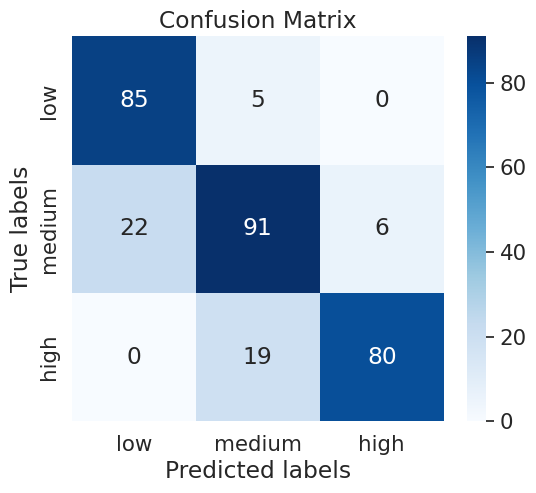

In [ ]:
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label2id.keys(), yticklabels=label2id.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from google.colab import files

!zip -r ./bert85.zip ./bert-base/checkpoint-135

  adding: bert-base/checkpoint-135/ (stored 0%)
  adding: bert-base/checkpoint-135/training_args.bin (deflated 51%)
  adding: bert-base/checkpoint-135/special_tokens_map.json (deflated 42%)
  adding: bert-base/checkpoint-135/tokenizer.json (deflated 71%)
  adding: bert-base/checkpoint-135/config.json (deflated 48%)
  adding: bert-base/checkpoint-135/tokenizer_config.json (deflated 75%)
  adding: bert-base/checkpoint-135/model.safetensors (deflated 8%)
  adding: bert-base/checkpoint-135/vocab.txt (deflated 53%)
  adding: bert-base/checkpoint-135/trainer_state.json (deflated 70%)
  adding: bert-base/checkpoint-135/scheduler.pt (deflated 56%)
  adding: bert-base/checkpoint-135/rng_state.pth (deflated 24%)
  adding: bert-base/checkpoint-135/optimizer.pt (deflated 39%)


In [ ]:
files.download("./bert85.zip")

In [ ]:
from transformers import pipeline

model_name_or_path = "./bert-base/checkpoint-90" #path/to/your/model/or/name/on/hub
pipe = pipeline("text-classification", model=model_name_or_path)
pipe("Poor institution policy ")

[{'label': 'high', 'score': 0.5554230809211731}]